In [ ]:
# importing pandas which helps for visualization and dataset reading.
import pandas 
# importing numpy which is used to working with arrays.
import numpy 
# importing pyplot package which is used to showing graphs.
import matplotlib.pyplot as PLOT 

In [ ]:
# reading data using pandas.
covid_dataset_daily = pandas.read_csv('/content/drive/MyDrive/anantha enquiry/worldometer_coronavirus_daily_data.csv')
covid_dataset_daily.head(2) 

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [ ]:
covid_dataset_daily.info() # checking information of dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184787 entries, 0 to 184786
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     184787 non-null  object 
 1   country                  184787 non-null  object 
 2   cumulative_total_cases   184787 non-null  float64
 3   daily_new_cases          174329 non-null  float64
 4   active_cases             166747 non-null  float64
 5   cumulative_total_deaths  178227 non-null  float64
 6   daily_new_deaths         157850 non-null  float64
dtypes: float64(5), object(2)
memory usage: 9.9+ MB


In [ ]:
covid_dataset_daily.describe().T 

,count,mean,std,min,25%,50%,75%,max
cumulative_total_cases,184787.0,725108.864043,3.681471e+06,0.0,1099.0,17756.0,223808.5,84209473.0
daily_new_cases,174329.0,2987.633285,1.780323e+04,-322.0,0.0,58.0,728.0,909610.0
active_cases,166747.0,62392.825046,3.955641e+05,-14321.0,60.0,1386.0,14620.5,17935434.0
cumulative_total_deaths,178227.0,13885.998126,6.049521e+04,0.0,24.0,304.0,4111.0,1026646.0
daily_new_deaths,157850.0,39.831834,1.811028e+02,-39.0,0.0,1.0,12.0,5093.0


In [ ]:
covid_dataset_daily.isnull().sum()  # checking null values from dataset.

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64

In [ ]:
covid_dataset_daily=covid_dataset_daily.dropna()   # droping all values from dataset.

In [ ]:
covid_dataset_daily.shape # checking shape of data.

(142034, 7)

# Line Plot Graph Visualization

In [ ]:
Select_1st_Country_of_data ='Afghanistan'

New_dataset = covid_dataset_daily[covid_dataset_daily['country']==Select_1st_Country_of_data]  
New_dataset.index = pandas.to_datetime(New_dataset['date'])   

In [ ]:
New_dataset.shape

(810, 7)

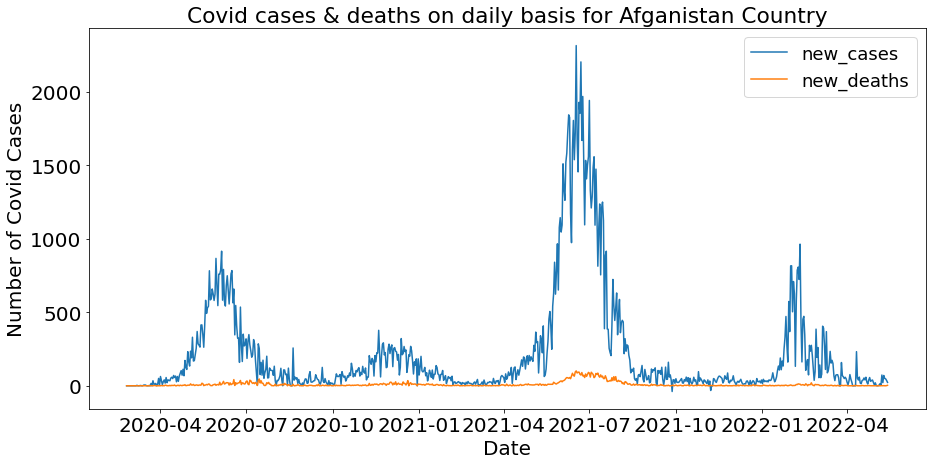

In [ ]:
# define figure size.
fig,ax = PLOT.subplots(figsize=(15,7))  
# define font_size.
PLOT.rcParams.update({'font.size': 18})  
# we pass our dataset.
PLOT.plot(New_dataset.index,New_dataset[['daily_new_cases','daily_new_deaths']])    
PLOT.legend(['new_cases','new_deaths'])  
# we fix x label.
PLOT.xlabel('Date') 
# we fix y label.
PLOT.ylabel('Number of Covid Cases') 
# we set title for graph. 
PLOT.title('Covid cases & deaths on daily basis for Afganistan Country')   
PLOT.show() 

# Bar Graph Visualization Of Top 10 Country

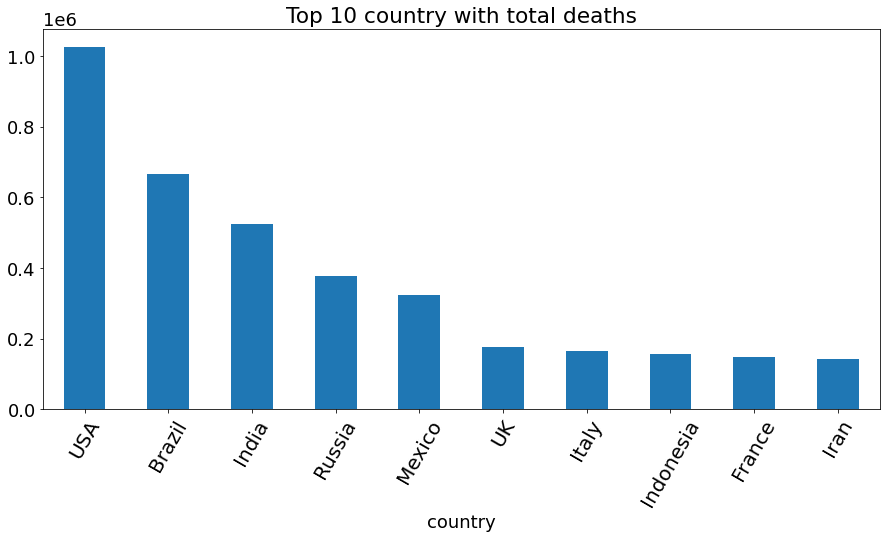

In [ ]:
# we extract top 10 country with total deaths using groupby.
Top_10_Countries = covid_dataset_daily.groupby('country')['cumulative_total_deaths'].max().sort_values(ascending = False).head(10) 
# passing all parameter for graph.
Top_10_Countries.plot(kind = "bar",figsize = (15 , 7),title="Top 10 country with total deaths") 
PLOT.xticks(fontsize=20, rotation=60) ;  

# Scatter Plot Visualization Of Top 5 Country

In [ ]:
Country_1st = covid_dataset_daily[covid_dataset_daily['country']=='USA'] 
Country_2nd = covid_dataset_daily[covid_dataset_daily['country']=='Brazil']
Country_3rd = covid_dataset_daily[covid_dataset_daily['country']=='India'] 
Country_4th = covid_dataset_daily[covid_dataset_daily['country']=='Russia'] 
Country_5th = covid_dataset_daily[covid_dataset_daily['country']=='Mexico']  

Top_5_countries= pandas.concat([Country_1st, Country_2nd,Country_3rd,Country_4th,Country_5th])  
Top_5_countries.head()   

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
176592,2020-2-20,USA,15.0,0.0,10.0,0.0,0.0
176593,2020-2-21,USA,35.0,20.0,29.0,0.0,0.0
176594,2020-2-22,USA,35.0,0.0,29.0,0.0,0.0
176595,2020-2-23,USA,35.0,0.0,28.0,0.0,0.0
176596,2020-2-24,USA,53.0,18.0,48.0,0.0,0.0


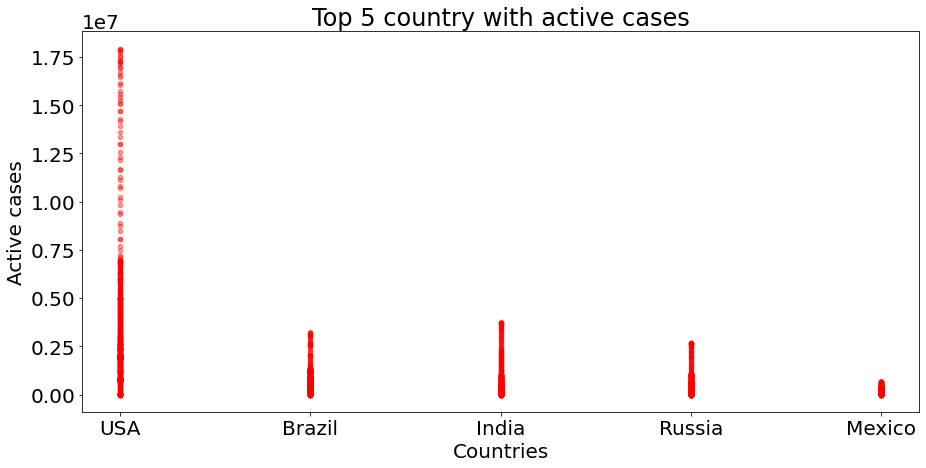

In [ ]:
# Scatter Plot  
# define figure size.
PLOT.rcParams['figure.figsize']=(15,7) 
# define font_size.
PLOT.rcParams.update({'font.size': 20}) 
# passing all variables.
Top_5_countries.plot(kind="scatter", x="country", y="active_cases", alpha=0.4,color='r')   
# we fix x label. 
PLOT.xlabel("Countries")
# we fix y label.
PLOT.ylabel("Active cases") 
# set title for graph.
PLOT.title("Top 5 country with active cases")  
PLOT.show() ; 